# A Simple Perceptron

We'll implement a simple but limited Perceptron using `for` loops. We will then show how to replace some operations with `numpy` commands, speeding up the calculations and making the code fully general.

In [194]:
%matplotlib inline
# from IPython.external import mathjax; mathjax.install_mathjax()
import numpy as np
import random
import pandas as pd
import matplotlib.pylab as plt

## Dataset generation

We consider two types of dataset: those that are *separable* by a line in feature space, and those that aren't.

### Linearly separable

In [195]:
def linearly_seperable_data(num_instances, epsilon=0.1):
    '''
    generates a linearly separable data set
    '''
    # fill the first column (the labels) randomly with -1s and 1s
    labels = 2 * np.random.randint(0, 2, num_instances) - 1
    # pick x1 at random
    x1 = np.random.random(num_instances)
    # base x2 off of x1, add random noise and epsilon, and move up or down
    x2 = x1 + ((epsilon + np.random.random(num_instances)) * labels)
    return pd.DataFrame({'x1': x1, 'x2': x2, 'label': labels})

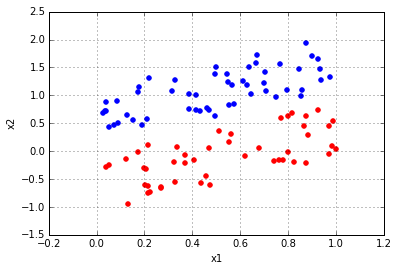

In [196]:
D_lin_sep  = linearly_seperable_data(100)
fig, ax = plt.subplots()
D_lin_sep.query('label == 1').plot(kind='scatter', x='x1', y='x2', ax=ax, color='b')
D_lin_sep.query('label == -1').plot(kind='scatter', x='x1', y='x2', ax=ax, color='r');

### Two Gaussians

In [197]:
def gaussian_data(num, epsilon=0.5):
    '''
    generates a data set from two overlapping Gaussian point clouds
    '''
    x1_p1 = np.random.normal(1.0 + epsilon, size=num/2)
    x2_p1 = np.random.normal(1.0, size=num/2)

    x1_p2 = np.random.normal(-(1.0 + epsilon), size=num/2)
    x2_p2 = np.random.normal(-(1.0 + epsilon), size=num/2)

    x1 = np.concatenate([x1_p1, x1_p2])
    x2 = np.concatenate([x2_p1, x2_p2])

    labels = np.ones(num)
    labels[:num/2] = -1
    
    return pd.DataFrame({'x1': x1, 'x2': x2, 'label': labels})

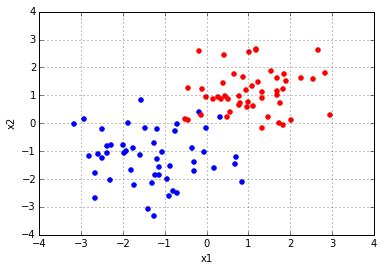

In [198]:
D_gaussian  = gaussian_data(100, epsilon=0.2)
fig, ax = plt.subplots()
D_gaussian.query('label == 1').plot(kind='scatter', x='x1', y='x2', ax=ax, color='b')
D_gaussian.query('label == -1').plot(kind='scatter', x='x1', y='x2', ax=ax, color='r');

Learning a perceptron
----

Now we can specify our perceptron. Again, we provide separate functions for training (fitting the model to the data set) and testing (making a prediction). The training function, `fit()` also has a parameter that controls the number of epochs.

In [199]:
def fit(train_data, num_epochs=20):
    models = []
    w1 = 0; w2 = 0; bias = 0

    for epoch in range(num_epochs):
        for idx, instance in train_data.iterrows():
            activation = instance['x1'] * w1 + instance['x2'] * w2 + bias
            pred_label = np.sign(activation)
    
            if pred_label != instance['label']:
                w1 += instance['label'] * instance['x1']
                w2 += instance['label'] * instance['x2']
                bias += instance['label']
        
        models.append((w1, w2, bias))
                
    return models

In [200]:
models = fit(D_lin_sep)
models[-1]

(-2.6760543559049532, 3.1588629237922712, 0.0)

### Prediction on new data

In [201]:
def predict(test_data, model):
    w1, w2, bias = model
    predictions = []
    for idx, instance in test_data.iterrows():
        activation = instance['x1'] * w1 + instance['x2'] * w2 + bias
        predictions.append(np.sign(activation))

    return predictions

### Running the model

Finally, we can execute our code.

First, we need some data to train on. Rather than use an existing data set, we will use a synthetic one that we generate ourselves. We use a function `get_data` that guarantees that our data is indeed linearly separable. The parameter `epsilon` ($\epsilon$) controls how large the separation gap is.

To convince ourselves that it is separable, we can plot the data. You can set different values for $\epsilon$ to see how it affects the data spread.

In [202]:
models = fit(D_lin_sep, 10)
models

[(-1.427000818314514, 2.8142826246175847, 0.0),
 (-2.6760543559049532, 3.1588629237922712, 0.0),
 (-2.6760543559049532, 3.1588629237922712, 0.0),
 (-2.6760543559049532, 3.1588629237922712, 0.0),
 (-2.6760543559049532, 3.1588629237922712, 0.0),
 (-2.6760543559049532, 3.1588629237922712, 0.0),
 (-2.6760543559049532, 3.1588629237922712, 0.0),
 (-2.6760543559049532, 3.1588629237922712, 0.0),
 (-2.6760543559049532, 3.1588629237922712, 0.0),
 (-2.6760543559049532, 3.1588629237922712, 0.0)]

### Training data accuracy

In [203]:
y_pred = predict(D_lin_sep, models[-1])
accuracy = (D_lin_sep.label == y_pred).sum() / len(y_pred)
accuracy

1.0

In [204]:
def get_y(x, w1, w2, bias):
    '''
    compute y value for specific x, given the weights and bias
    (helper function for decision boundary)
    '''
    return (((-1 * x * w1) - bias) / w2)


def plot_decision_boundary(model, ax, alpha=0.1, color='black', thickness=1):
    '''
    plot the decision boundary
    '''
    w1, w2, bias = model
    x_min = -100
    x_max = 100
    ax.plot([x_min, x_max], 
            [get_y(x_min, w1, w2, bias), get_y(x_max, w1, w2, bias)], 
            'k-', alpha=alpha, c=color, lw=thickness)


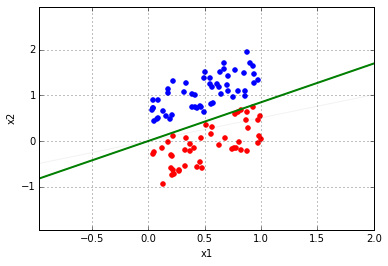

In [205]:
fig, ax = plt.subplots()
for model in models[:-1]:
    plot_decision_boundary(model, alpha=0.1, color='gray', thickness=1, ax=ax)

plot_decision_boundary(models[-1], alpha=1.0, color='green', thickness=2, ax=ax)

D_lin_sep.query('label == 1').plot(kind='scatter', x='x1', y='x2', ax=ax, color='b')
D_lin_sep.query('label == -1').plot(kind='scatter', x='x1', y='x2', ax=ax, color='r');


ax.set_xlim(D_lin_sep.x1.min() - 1, D_lin_sep.x1.max() + 1)
ax.set_ylim(D_lin_sep.x2.min() - 1, D_lin_sep.x2.max() + 1);

### All models for the Gaussian case

In [206]:
models = fit(D_gaussian, 100)
train_accuracies = []
for model in models:
    y_pred = predict(D_gaussian, model)
    accuracy = (D_gaussian.label == y_pred).sum() / len(y_pred)
    train_accuracies.append(accuracy)

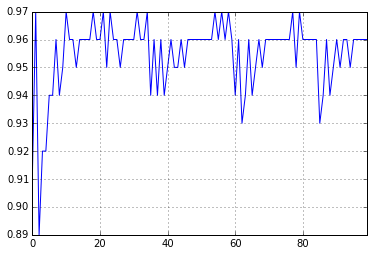

In [207]:
pd.Series(train_accuracies).plot()

Once training has finished, we can compute predictions with the final weights. This is the same calculation as we have used to compute the activations in each iteration (we could have thus written a function to do it, so we don't repeat code. We'll do it here for clarity). However, we are not interested in the performance on the training data, but on the performance on a new, held-out, previously unseen data set. We call it the **test set**.

You can again play around with $\epsilon$ in the test set: what happens to accuracy if you make $\epsilon$ smaller in the test than in the training data; what if you make it bigger. Can you think of why?

In [208]:
def plot_data_set(data, ax, alpha=1.0, misclassified=None):
    '''
    output data set as scatter plot
    '''
    positives = data.query('label == 1')
    negatives = data.query('label == -1')
    
    ax.scatter(positives['x1'], positives['x2'], color='blue', alpha=alpha)
    ax.scatter(negatives['x1'], negatives['x2'], color='red', alpha=alpha)

    if misclassified is not None:
        for label, x, y in zip(misclassified, data['x1'], data['x2']):
            if label == True:
                ax.annotate(
                    "missclassified", 
                    xy = (x, y), xytext = (-20, 20),
                    textcoords = 'offset points', ha = 'right', va = 'bottom',
                    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

(-5.161963548707611, 3.8634045263917445)

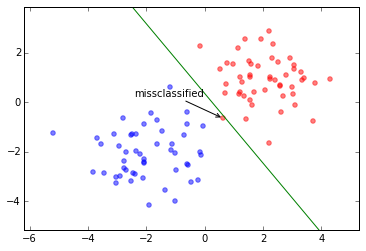

In [209]:
# get test data and labels
# test_data, test_labels = get_gaussian_data(100)
fig, ax = plt.subplots()

test_data = gaussian_data(100, epsilon=1)
test_predictions = predict(test_data, models[-1])

plot_data_set(test_data, alpha=0.5, misclassified=(list(test_predictions != test_data['label'])), ax=ax)

plot_decision_boundary(model, alpha=1.0, color='green', thickness=1, ax=ax)
plt.xlim(test_data.x1.min() - 1, test_data.x1.max() + 1)
plt.ylim(test_data.x2.min() - 1, test_data.x2.max() + 1)

#print("accuracy on test:", test_accuracy)

What happens if you set the epsilon in `get_data` to a negative value? Try for both train and test set.

3. NumPy
======

The `numpy` (for numerical Python) library includes fast implementations of several mathematic operations, especially linear algebra. While it originally did not come included in Python, it has become the de factor standard for most scientific work (there is another library, `scipy`, which builds on `numpy` and has additional functionality).

In this lecture, we will use `numpy` to implement a perceptron from scratch with only a few lines of code. The code is largely based on the examples in Stephen Marsland's book "Machine Learning. An Algorithmic Perspective".

While the simple perceptron is not the most powerful or exciting machine learning algorithms, it is one of the first, and it forms the basis for the multi-layer perceptron, which in turn is the basis for deep neural networks.

In the following, we will use `np` for `numpy`.


## List of  `numpy` functions used in in this lecture

**`np.array(`*list or shape tuple*`)`:** If you give it a list (of lists), say `[[1,2], [3,4]]` it will use them to build a matrix. Here it's one with two rows (each list is one row), with two columns each (each )). If you only specify a tuple, say `(2,2)`, it will generate an empty matrix.

In [210]:
a = np.array([[1,2], [3,4]])
a

array([[1, 2],
       [3, 4]])

**`np.array.shape`:** This returns a tuple with the number of columns and rows.

In [211]:
a.shape

(2, 2)

**`np.random.rand(`*shape*`)`:** this generates an array of the defined shape and populates it with values between $0.0$ and $1.0$.

In [212]:
a = np.random.rand(2)
b = np.random.rand(2,3)
print(a)
print(b)

[ 0.23067921  0.2693511 ]
[[ 0.38338136  0.93160719  0.62226358]
 [ 0.4225663   0.41937121  0.74610631]]


**`np.dot(`*array1, array2*`)`:** returns the dot product of two vectors. Remember that the inner dimensions (columns of array1 and rows of array2) need to be the same. The result has the number of rows of array1 and the number of columns of array2. This is why you get a scalar if you take the dot product of vectors, but an array when one of the arrays is multidimensional.

In [213]:
print(np.dot(a,a))
print(np.dot(a,b))

0.125762917844
[ 0.20225681  0.32786052  0.34450783]


**`np.concatenate(`*list of arrays*`)`:** this is the same as `extend()` for lists, but the arrays you give it have to have the same shape.

In [214]:
print(np.concatenate([a,a]))
print(np.concatenate([b,b]))

[ 0.23067921  0.2693511   0.23067921  0.2693511 ]
[[ 0.38338136  0.93160719  0.62226358]
 [ 0.4225663   0.41937121  0.74610631]
 [ 0.38338136  0.93160719  0.62226358]
 [ 0.4225663   0.41937121  0.74610631]]


**`np.sign(`*value*`)`:** returns $1$ if the value is positive, $-1$ if it is negative.

In [215]:
np.sign(232)

1

## The Perceptron in `NumPy`



Now, we have all the ingredients to modify our perceptron. It will make the code a little bit easier, but it will also make it faster when you have a lot of instances and epochs: matrix operations are usually much faster than `for`-loops.

We again set the weights to a bunch of small random numbers, but we use an array of length 3. For this, we can use `np.random.rand()`. We multiply the resulting vector with $0.01$ (to get smaller numbers) and subtract $0.05$ (to generate some negative weights as well).

At each iteration, we can now simply compute the dot product between the instance and the weights, and we naturally use `np.dot()` for it. To check whether the activation is positive or negative, we use `np.sign()` on the resulting scalar.

Note that we now need to add a **bias term** to the the inputs. We do this by specifying another column in the DataFrame.

We do the same in the `predict()` function, but here we simply call `np.dot()` on the entire test data and the weight vector. The result is another vector, with an activation value for each instance.

In [216]:
def fit_np(X, labels, num_epochs=20):
    weights = np.zeros(3)

    for epoch in range(num_epochs):
        for i in range(X.shape[0]):
            activation = np.dot(X[i], weights)
    
            if np.sign(activation) != labels[i]:
                weights += X[i] * labels[i]
                
    return weights

def predict_np(X, weights):
    predictions = np.sign(np.dot(np.array(test_data), weights))
    return predictions

Training is called just as before, but the return value is no longer a tuple (`w1, w2, bias`), but a vector called `weights`.

In [217]:
# Train on Gaussian data
train_data = gaussian_data(100)
train_data['bias'] = 1

X = train_data[[col for col in train_data.columns if col != 'label']].values
labels = train_data.label.values
weights = fit_np(X, labels) 
model = (weights[0], weights[1], weights[2])
model

(-2.6572858592914832, -2.2920892335540506, 0.0)

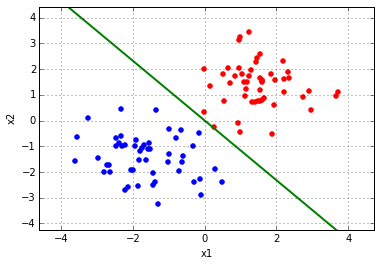

In [218]:
# Plot the decision boundary
fig, ax = plt.subplots()
plot_decision_boundary(model, color='green', alpha=1, thickness=2, ax=ax)

train_data.query('label == 1').plot(kind='scatter', x='x1', y='x2', ax=ax, color='b')
train_data.query('label == -1').plot(kind='scatter', x='x1', y='x2', ax=ax, color='r');

ax.set_xlim(train_data.x1.min() - 1, train_data.x1.max() + 1)
ax.set_ylim(train_data.x2.min() - 1, train_data.x2.max() + 1);